# Aplicando eigenfaces para reconhecimento facial

Feita a explicação teórica, vamos à aplicação prática. Nesse projeto, temos 20 imagens do artista William Smith e outras 20 da cantora Taylor Swift. Nosso objetivo é verificar se o método de eigenfaces é capaz de distingui-los e indentificá-los.  
Inicialmente, importamos as bibliotecas necessárias.

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

Para que o método funcione, é necessário que todas as imagens possuam as mesmas dimensões. Dessa forma, optamos por figuras de tamanho 195x231.

In [146]:
altura_imagem = 231
comprimento = 195

A seguir, fizemos a leituras das imagens e as convertemos em uma matriz tridimensional (cada imagem é uma matriz bidimensional e sua composição adiciona uma terceira dimensão).

In [147]:
# Criando o path para onde as imagens estão
famousim = "imagens_artistas/"
# Criando uma lista para adicionar as imagens
famous_images = []

# Fazendo um loop for para iterar sobre todas as imagens
for folder in (os.listdir(famousim)):
    folder_path = os.path.join(famousim, folder)
    for image in (os.listdir(folder_path)):
        # Adicionando o path com cada imagem para termos o arquivo das imagens
        path = os.path.join(famousim, folder ,image)
        # Lendo a imagem
        img = cv2.imread(path)
        # Convertendo a imagem para preto e branco 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Adicionando a imagem na lista
        famous_images.append(img)

# Transformando a lista num array
famous_images_np = np.array(famous_images)

Vamos dar uma olhada nas nossas imagens.

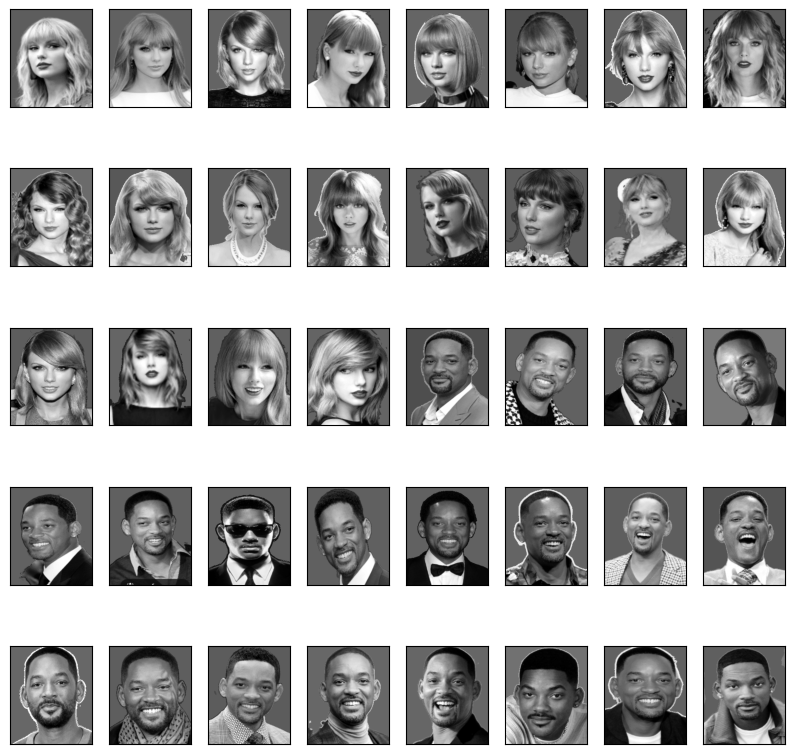

In [148]:
# Plotando as imagens
count = 0
fig, ax = plt.subplots(5, 8, figsize=(10, 10))
for linha in range(5):
    for coluna in range(8):
        ax[linha,coluna].imshow(famous_images_np[count], cmap='gray')
        count += 1
        ax[linha, coluna].set_xticks([])
        ax[linha, coluna].set_yticks([])
        ax[linha, coluna].set_xticklabels([])
        ax[linha, coluna].set_yticklabels([])
        ax[linha, coluna].set_xlabel('')
        ax[linha, coluna].set_ylabel('')

Agora, transformamos essa matriz tridimensional em uma matriz bidimensional convertendo as matrizes de cada imagem para um único vetor-linha extremamente comprido. Após isso, calculamos a face média.

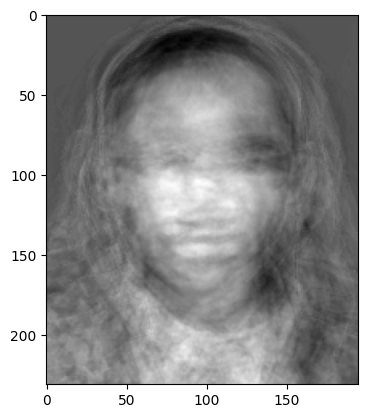

In [149]:
# Cada imagem está armazenada em 3 dimensões, cada foto está numa lista, e cada lista é uma lista de listas.
# Vamos transformar a imagem num vetor coluna muito grande.
train_famous_np_matrix = famous_images_np.reshape(famous_images_np.shape[0], famous_images_np.shape[1]*famous_images_np.shape[2])
# Calculamos a face média
mean_train_face = np.mean(train_famous_np_matrix, axis=0)
# Criamos uma matriz subtraindo a face média
centered_train_face = train_famous_np_matrix - mean_train_face

# Mostrando a face média
plt.figure()
plt.imshow(mean_train_face.reshape(altura_imagem,comprimento), cmap='gray')


A seguir, calculamos a decomposição SVD dessa matriz.

In [150]:
# Decompomdo a matriz em SVD
U_Face_Famous, D_Face_Famous, V_Face_Famous = np.linalg.svd(centered_train_face, full_matrices=False)

Vamos selecionar as 12 primeiras componentes principais e plotar suas eigenfaces.

In [151]:
# Vamos obter a quantidade de componentes que queremos de nossa matriz.
C_Faces_TRAIN = V_Face_Famous[:12]
eigen_faces_train = C_Faces_TRAIN.reshape((-1, altura_imagem, comprimento))

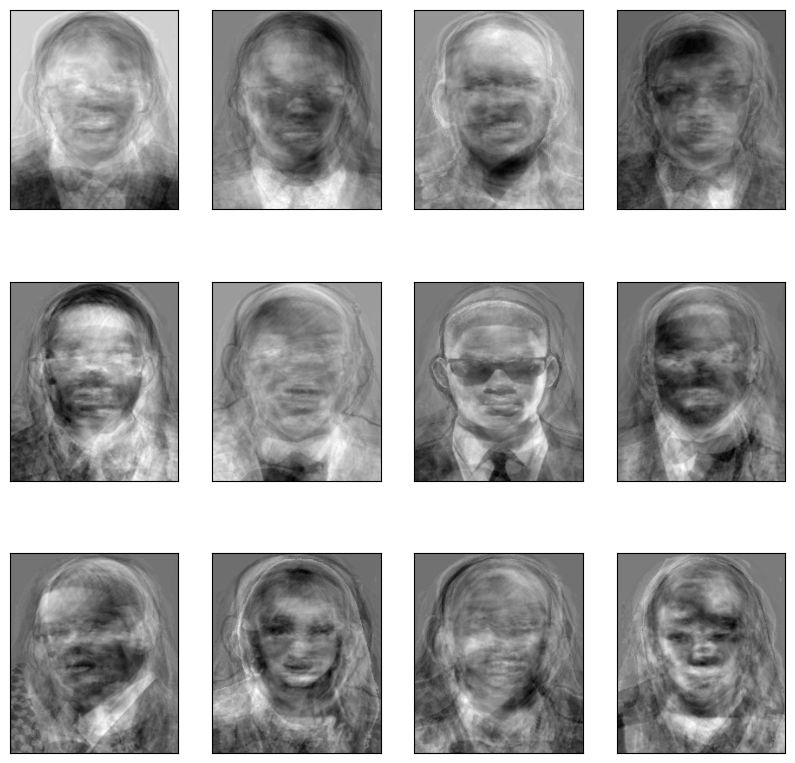

In [152]:
count = 0
fig, ax = plt.subplots(3, 4, figsize=(10, 10))
for linha in range(3):
    for coluna in range(4):
        ax[linha,coluna].imshow(eigen_faces_train[count], cmap='gray')
        count += 1
        ax[linha, coluna].set_xticks([])
        ax[linha, coluna].set_yticks([])
        ax[linha, coluna].set_xticklabels([])
        ax[linha, coluna].set_yticklabels([])
        ax[linha, coluna].set_xlabel('')
        ax[linha, coluna].set_ylabel('')

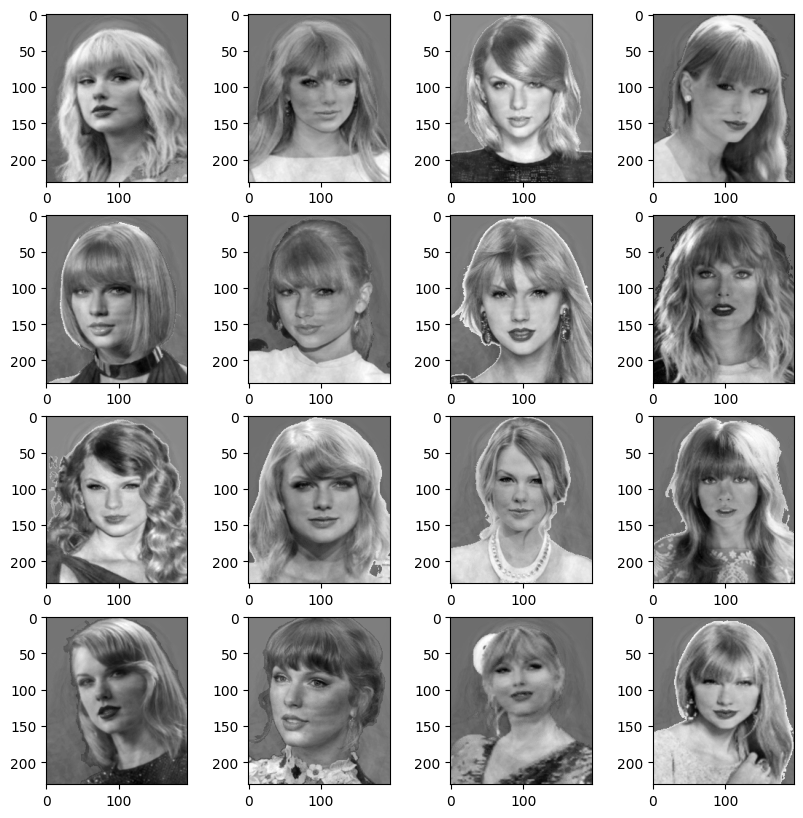

In [153]:
numero_imagens = 4
count = 0
fig, ax = plt.subplots(numero_imagens, numero_imagens, figsize=(10, 10))
for linha in range(numero_imagens):
    for coluna in range(numero_imagens):
        ax[linha,coluna].imshow(centered_train_face[count].reshape(altura_imagem,comprimento), cmap='gray')
        count += 1

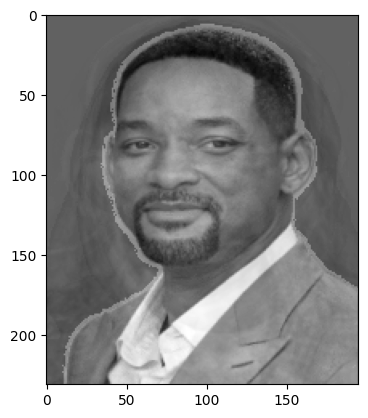

In [154]:
img = cv2.imread("imagens_artistas\WS\Captura de tela 2023-11-11 140222.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.array(img)
img = img.flatten()
img = img - np.mean(img)
coordinates = np.dot(V_Face_Famous, img)
new_img = np.dot(V_Face_Famous.T, coordinates)
new_img = new_img + mean_train_face

plt.figure()
plt.imshow(new_img.reshape(231,195), cmap='gray')
plt.show()

Text(0, 0.5, '% de explicação do dado')

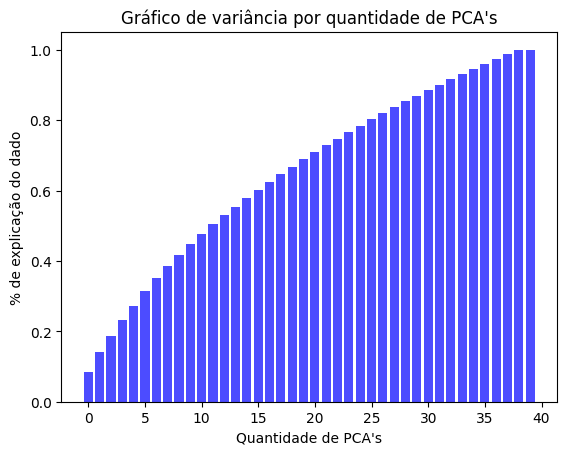

In [155]:
# O quanto cada autovalor representa do dado?

# Somando todos os autovalores
sum_all = sum(D_Face_Famous)
# Transformando o array com os autovalores numa soma cumulativa
cummulative = np.cumsum(D_Face_Famous).round(2)
# Vendo quanto representa do total
percentage = cummulative/sum_all

# Plotando o gráfico
plt.bar(range(len(percentage)), percentage, color='blue', alpha=0.7)
plt.title("Gráfico de variância por quantidade de PCA's")
plt.xlabel("Quantidade de PCA's")
plt.ylabel("% de explicação do dado")


In [156]:

# Nossa ideia agora, será pegar os dois principais componentes encontradas pelo PCA e então plotar as nossas imagens nesse subespaço
dois_maiores_PCAs = V_Face_Famous[:2]

# Criando a lista o qual terão as coordenadas das imagens que já trainamos o nosso dado
coordinates = []

# Fazendo um loop for para adicionar todas as imagens nessa lista
for img in centered_train_face:
    # Fazendo o produto interno para achar a projeção de cada face no espaço das duas principais componentes.
    coordinates_xy = np.dot(dois_maiores_PCAs, img)
    # Adicionando na lista
    coordinates.append(coordinates_xy)


In [157]:
# Agora que já temos os dados dos elementos que plotamos, vamos tentar pegar imagens que não foram utilizadas e então plotar no nosso espaço para determinar se a pessoa é mais parecida com o will smith ou com a talor swift.

# Adicionando o path
training_set = "imagens_datateste/"

# criando um dicionário que terá o nome das pessoas e as coordenadas
coordinates_new_dict = {}

# Iterando sobre cada imagem da pasta
for image_name in os.listdir(training_set):
    # Pegando o caminho até ela
    image_path = os.path.join(training_set, image_name)
    print(image_path)

    # Realizando procedimentos pra ler a imagem
    img = cv2.imread(image_path)
    # Transformando num cinza
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Transformando em array
    img = np.array(img)
    # transformando num array unidimensional
    img = img.flatten()
    # retirando a imagem nova
    img = img - mean_train_face

    # Fazendo o produto interno para achar a projeção no espaço que queremos
    coordinates_new = np.dot(dois_maiores_PCAs, img)

    # Colocando as coordenadas num dicionário
    coordinates_new_dict[str(image_name[0:-4])] = coordinates_new


# Colocando uma lista de cores para diferenciar taylor swift e will smith
colors = []
iteracao = 1

for number in range(len(coordinates)):
    if iteracao <= 20:
        colors.append("red")
        iteracao += 1
    elif iteracao <= 40:
        colors.append("blue")
        iteracao += 1

# Definindo a cor do teste
colors.append("black")


imagens_datateste/hannah_montana.png
imagens_datateste/michele_obma.png
imagens_datateste/ronaldinho_gaucho.png
imagens_datateste/taylor_2.png
imagens_datateste/will_smith.png
imagens_datateste/yuri_lindo_saporito.png


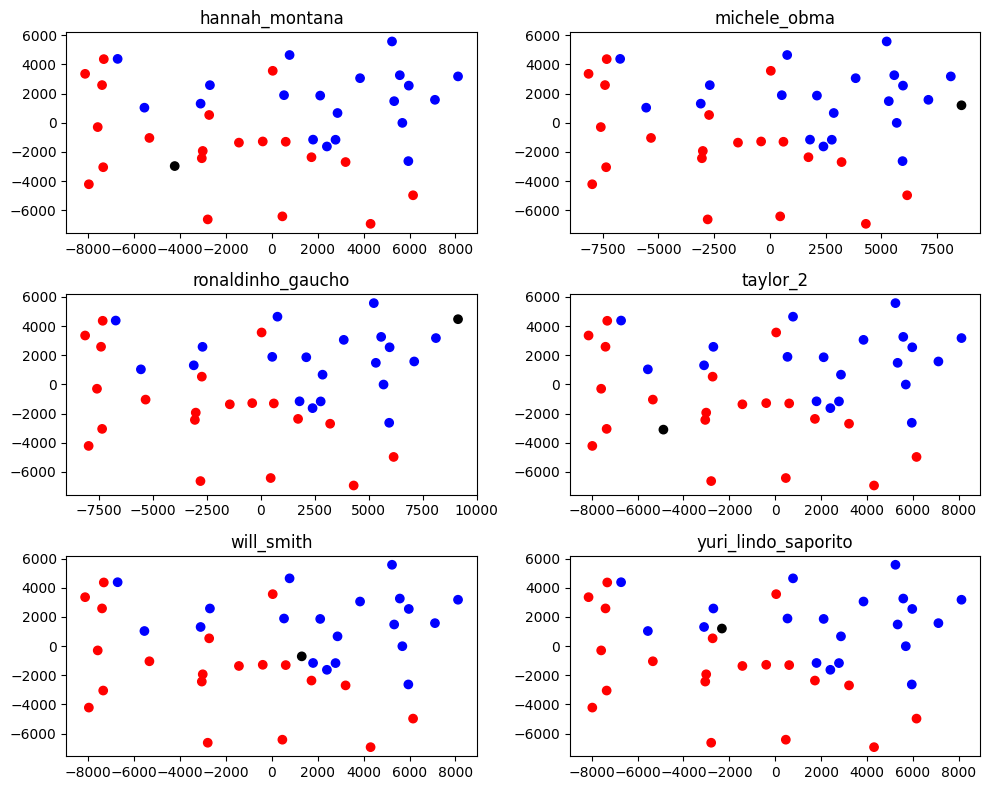

In [158]:

# Criando um grid plot com as pessoas
fig, axes = plt.subplots(3, 2, figsize=(10, 8))
axes = axes.flatten()

# Criando um loop para iterar sobre cada plot
for i, (name, values) in enumerate(coordinates_new_dict.items()):
    ax = axes[i]
    
    ax.set_title(str(name))

    # criando uma cópia das coordenadas
    temp_coordinates = coordinates.copy()
    
    # colocando as coordenadas que estão no dicionário na lista
    temp_coordinates.append(values)
    
    # Transformando em array e transpondo a matriz
    temp_coordinates = np.array(temp_coordinates).T
    
    # Fazendo o scatter plot
    ax.scatter(temp_coordinates[0], temp_coordinates[1], c=colors)

    

# Mostrando o gráfico
plt.tight_layout()
plt.show()    
    